von Fabian Wolter und Selin Kabak
# Kalibrierung und Einsatz eines
# Infrarot-Entfernungsmessers
### Versuch 1, Praktikum Signale, Systeme und Sensoren

TODO (1)
: Erstellen Sie eine Python-Funktion, welche die Daten aus der Datei einliest 
(verwenden Sie dazu die Numpy-Funktion genfromtxt()), von den Daten die ersten 
1000 Werte überspringt und aus den nächsten Werten (nehmen Sie eine sinnvolle 
Anzahl von Messungen) den Mittelwert und die Standardabweichung berechnet 
(der Einschwingvorgang wird dadurch ignoriert). Vergleichen Sie die Ergebnisse 
mit den Werten aus Ihrer gemessenen Tabelle. Stellen Sie die gefundene 
Übertragungsfunktion bzw. Kennlinie im Notebook graphisch mit Python bzw. Matplotlib dar. 

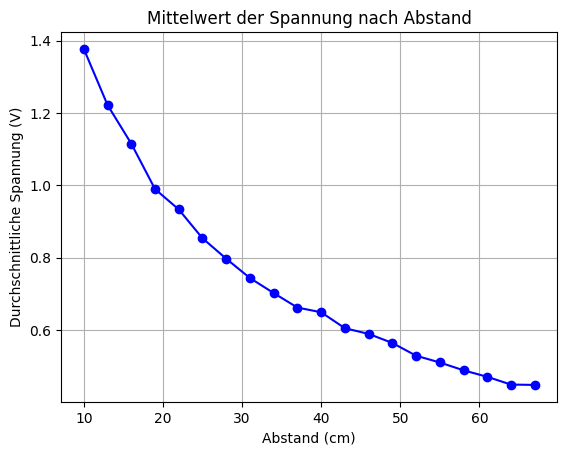

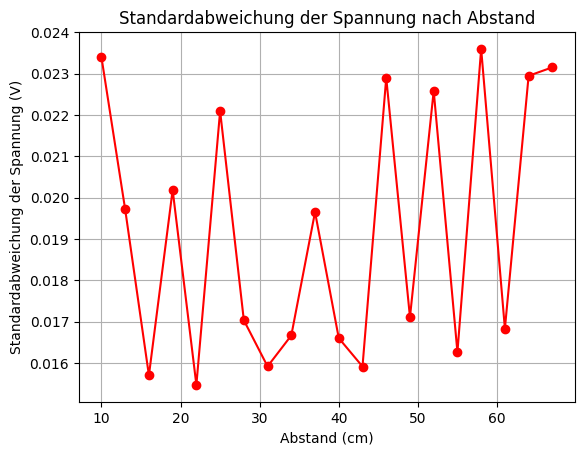

In [43]:
import numpy as np
import os
import matplotlib.pyplot as plt

def processData(file_path, skip_header=1000):
    try:
        data = np.genfromtxt(
            file_path, 
            delimiter=';', 
            skip_header=skip_header,  
            usecols=(1), 
            converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))}
        )
        mean = np.mean(data)
        std = np.std(data)
        return mean, std
    except Exception as e:
        print(f"Fehler beim Einlesen")

directory = '/home/selin/HTWG-AIN/AIN3/sss/versuch1/data/'
distance = np.arange(10, 70, 3)

# Werte speichen
means = []
std_devs = []

for dist in distance:
    file_path = os.path.join(directory, f'{dist}cm.csv')
    mean, std = processData(file_path)
    
    if mean is not None and std is not None:
        means.append(mean)
        std_devs.append(std)
    else:
        means.append(None)  # Fehlende Werte für fehlende Dateien
        std_devs.append(None)

# Plot des Mittelwerts
plt.figure()
plt.plot(distance, means, 'bo-', label='Mittelwert')
plt.xlabel('Abstand in cm')
plt.ylabel('Durchschnittliche Spannung in V')
plt.title('Mittelwert der Spannung nach Abstand')
plt.grid(True)
plt.show()

# Plot der Standardabweichung
plt.figure()
plt.plot(distance, std_devs, 'ro-', label='Standardabweichung')
plt.xlabel('Abstand in cm')
plt.ylabel('Standardabweichung der Spannung in V')
plt.title('Standardabweichung der Spannung nach Abstand')
plt.grid(True)
plt.show()


### Probleme
`Fehler beim Einlesen der Datei /home/selin/HTWG-AIN/AIN3/sss/versuch1/data/70.csv: a bytes-like object is required, not 'str'`
